## 1. Import the relevant libraries that I may need for this project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Datasets that i will use are the following

* imdb.title.basics
* imdb.title.ratings
* bom.movie_gross

##### Importing the datasets

In [2]:
df1 = pd.read_csv("title.basics.csv")
df2 = pd.read_csv("title.ratings.csv")
df3 = pd.read_csv("bom.movie_gross.csv")

## 3. Getting a preview of the 3 datsets

##### ***Checking for the `shape`, `column names` and the `column type` of our datasets***

In [3]:
## i generally want to see which columns are similar
## with the dtypes function i will be able to see both the column name and the type instead of using the df.columns
print("Title.basics data")
print(df1.shape)
print(df1.dtypes)
print("\n")
print("Title.ratings data")
print(df2.shape)
print(df2.dtypes)
print("\n")
print("Bom.movie_gross data")
print(df3.shape)
print(df3.dtypes)

Title.basics data
(146144, 6)
tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object


Title.ratings data
(73856, 3)
tconst            object
averagerating    float64
numvotes           int64
dtype: object


Bom.movie_gross data
(3387, 5)
title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


##### ***Checking the first few entries of our datasets***

In [4]:
print("Title.basics data")
df1.head(3)

Title.basics data


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [5]:
print("Title.ratings data")
df2.head(3)

Title.ratings data


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


In [6]:
print("Bom.movie_gross data")
df3.head(3)

Bom.movie_gross data


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


##### ***Checking for missing values in our datasets***

In [7]:
print("Title.basics data")
df1.isna().sum()
## Quite a lot of missing values in this dataset

Title.basics data


tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [8]:
print("Title.ratings data")
df2.isnull().sum()
## No missing values in this dataset

Title.ratings data


tconst           0
averagerating    0
numvotes         0
dtype: int64

In [9]:
print("Bom.movie_gross data")
df3.isna().sum()
## Quite a lot of missing values in this dataset

Bom.movie_gross data


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

## 4. Merging our datasets

*First doing some minor cleaning before merging*<br>
*I have already identified my primary keys, tconst and movie title respectively*

In [10]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(146144, 6)
(73856, 3)
(3387, 5)


In [11]:
df1.dropna(inplace=True)
df2.dropna(inplace=True)
df3.dropna(inplace=True)

In [12]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(112232, 6)
(73856, 3)
(2007, 5)


In [13]:
# Because title is a unique identifier in our dataset, we want to drop duplicates

df3.drop_duplicates(subset="title").inplace=True
print(df3.shape)

(2007, 5)


***We now continue to merge***

In [14]:
## Using merge function to combine df1 and df2 using ID as "tconst"

df1_df2 = df1.merge(df2, how="inner", on="tconst", validate="1:1") 
# 1:1 checks if merge keys are unique for both df1 and df2
# inner join returns only rows with matching keys on both dataframes
#df1_df2.head()

In [15]:
## Now i want to add again df3 to df1_df2 using title of movie as ID
## I will use the primary title as my key
## This means we will have to rename the title name of the movies in bom-data-set first

df3 = df3.rename(columns={"title": "primary_title"})

df = df1_df2.merge(df3, how="right", on="primary_title")
## right join return all the rows from the right datafram(bom dataset) and the matched rows from the left(df1_df2), if no match then its NaN
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0435761,Toy Story 3,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy",8.3,682218.0,BV,415000000.0,652000000,2010
1,NaN,Alice in Wonderland (2010),NaN,NaN,NaN,NaN,NaN,NaN,BV,334200000.0,691300000,2010
2,NaN,Harry Potter and the Deathly Hallows Part 1,NaN,NaN,NaN,NaN,NaN,NaN,WB,296000000.0,664300000,2010
3,tt1375666,Inception,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,WB,292600000.0,535700000,2010
4,tt0892791,Shrek Forever After,Shrek Forever After,2010.0,93.0,"Adventure,Animation,Comedy",6.3,167532.0,P/DW,238700000.0,513900000,2010


## 5. Preview of our merged dataset

In [16]:
df.shape ## I have observed that the number of rows has significantly reduced

(2233, 12)

In [17]:
df.isna().sum() ## Checking for missing values

tconst             466
primary_title        0
original_title     466
start_year         466
runtime_minutes    466
genres             466
averagerating      466
numvotes           466
studio               0
domestic_gross       0
foreign_gross        0
year                 0
dtype: int64

In [18]:
df.dtypes ## Checking for the variable types that we have in our new dataset

tconst              object
primary_title       object
original_title      object
start_year         float64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes           float64
studio              object
domestic_gross     float64
foreign_gross       object
year                 int64
dtype: object

In [19]:
df.head(10) ## previewing the first 10 entries

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0435761,Toy Story 3,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy",8.3,682218.0,BV,415000000.0,652000000,2010
1,NaN,Alice in Wonderland (2010),NaN,NaN,NaN,NaN,NaN,NaN,BV,334200000.0,691300000,2010
2,NaN,Harry Potter and the Deathly Hallows Part 1,NaN,NaN,NaN,NaN,NaN,NaN,WB,296000000.0,664300000,2010
3,tt1375666,Inception,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,WB,292600000.0,535700000,2010
4,tt0892791,Shrek Forever After,Shrek Forever After,2010.0,93.0,"Adventure,Animation,Comedy",6.3,167532.0,P/DW,238700000.0,513900000,2010
5,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010.0,124.0,"Adventure,Drama,Fantasy",5.0,211733.0,Sum.,300500000.0,398000000,2010
6,tt1228705,Iron Man 2,Iron Man 2,2010.0,124.0,"Action,Adventure,Sci-Fi",7.0,657690.0,Par.,312400000.0,311500000,2010
7,tt0398286,Tangled,Tangled,2010.0,100.0,"Adventure,Animation,Comedy",7.8,366366.0,BV,200800000.0,391000000,2010
8,tt1323594,Despicable Me,Despicable Me,2010.0,95.0,"Animation,Comedy,Family",7.7,464511.0,Uni.,251500000.0,291600000,2010
9,tt0892769,How to Train Your Dragon,How to Train Your Dragon,2010.0,98.0,"Action,Adventure,Animation",8.1,611299.0,P/DW,217600000.0,277300000,2010


In [20]:
df.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,year
count,1767.000000,1767.000000,1767.000000,1.767000e+03,2.233000e+03,2233.000000
mean,2013.559706,107.895869,6.459706,9.692010e+04,4.686919e+07,2013.528885
std,2.621180,20.105904,0.991033,1.539057e+05,8.089320e+07,2.608264
min,2010.000000,3.000000,1.600000,5.000000e+00,4.000000e+02,2010.000000
25%,2011.000000,95.000000,5.900000,6.392500e+03,7.080000e+05,2011.000000
50%,2013.000000,106.000000,6.500000,3.987000e+04,1.710000e+07,2013.000000
75%,2016.000000,119.000000,7.100000,1.171330e+05,5.600000e+07,2016.000000
max,2019.000000,272.000000,9.200000,1.841066e+06,9.367000e+08,2018.000000


## 6. Data Cleaning

In [21]:
### I want first let me make a copy of the dataset i will be using for cleaning
df_cleaning = df.copy(deep = True)

Lets first drop the NA rows by tconst so that we continue

In [22]:
df_cleaning.dropna(axis= 0,inplace = True)
df_cleaning.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
studio             0
domestic_gross     0
foreign_gross      0
year               0
dtype: int64

In [23]:
print(df_cleaning.shape)

(1767, 12)


##### 6.1 Ensuring variable types are coherent

In [24]:
### i noticed the foreign_gross variable is an object yet it has integer/float values
df_cleaning['foreign_gross'].describe()

count        1767
unique        999
top       1200000
freq           16
Name: foreign_gross, dtype: object

In [25]:
##Firstly, i have noticed there are some values that needs particular attention i.e., '1,019.4', i have to replace the commas
df_cleaning['foreign_gross'] = df_cleaning['foreign_gross'].str.replace(",", "")

In [26]:
### so we have to convert it to a float
df_cleaning['foreign_gross'] = df_cleaning['foreign_gross'].astype(float)

In [27]:
## converting year into an integer
df_cleaning['start_year'] = df_cleaning['start_year'].astype(int)

In [28]:
df_cleaning.dtypes ## perfect, all my variables are as i expect them to be

tconst              object
primary_title       object
original_title      object
start_year           int32
runtime_minutes    float64
genres              object
averagerating      float64
numvotes           float64
studio              object
domestic_gross     float64
foreign_gross      float64
year                 int64
dtype: object

##### 6.2 Imputing the missing values

The columns that have missing values from what we saw up there are the following;

In [29]:
df_cleaning.isnull().sum().sort_values(ascending=False)
## Lucky me, i do not have missing values

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
studio             0
domestic_gross     0
foreign_gross      0
year               0
dtype: int64

In [30]:
### Now that i have dealt with the missing values, let me assign the dataset a new name so that i continue with other checks
df_cleaning2 = df_cleaning.copy(deep = True)
df_cleaning2.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218.0,BV,415000000.0,652000000.0,2010
3,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,WB,292600000.0,535700000.0,2010


##### 6.3 Keeping only the relevant columns

In [31]:
df_cleaning2.drop(columns = ["original_title"], inplace = True)
df_cleaning2.head(2)

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218.0,BV,415000000.0,652000000.0,2010
3,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,WB,292600000.0,535700000.0,2010


##### 6.4 Stripping off spaces in the string columns(if any)

In [32]:
columns_to_clean = ["tconst", "primary_title", "genres", "studio"]

for col in columns_to_clean:
    df_cleaning2[col] = df_cleaning2[col].str.strip()

df_cleaning2.head(2)

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218.0,BV,415000000.0,652000000.0,2010
3,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,WB,292600000.0,535700000.0,2010


##### 6.5 Checking for duplicates in our data

In [33]:
df_cleaning3 = df_cleaning2.copy(deep = True)

In [34]:
df_cleaning3.duplicated().sum()

0

In [35]:
### i dont have duplicates in my data so i am good to go to the next step

##### 6.6 Checking for outliers

NB: i will use the numeric columns to check for outliers i.e., `runtime_minutes`, `averagerating`, `numvotes`, `domestic_gross`

Checking for outliers for instance in `runtime_minutes` variable

Text(0.5, 1.0, 'Boxplot visual for runtime (minutes)')

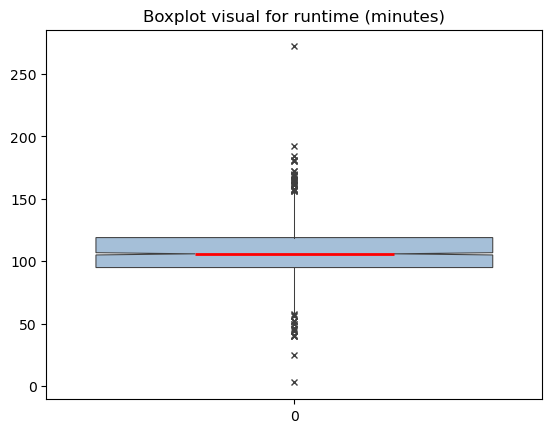

In [36]:
sns.boxplot(df_cleaning3["runtime_minutes"], 
            linewidth=.75,
            notch=True, 
            showcaps=False,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.3, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 2})

plt.title("Boxplot visual for runtime (minutes)")

I will use the interquartile range (IQR) method to deal with the outliers by clipping them.
Clipping simply means that we are trim them to fit within a given interval

In [37]:
## Function

def handle_outliers(colmn):
    Q1 = df_cleaning3[colmn].quantile(0.25)
    Q3 = df_cleaning3[colmn].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaning3[colmn] = df_cleaning3[colmn].clip(lower = lower_bound, upper = upper_bound)

In [38]:
## lets now test if our function is working

In [39]:
handle_outliers("runtime_minutes")

Text(0.5, 1.0, 'Boxplot visual for runtime (minutes)')

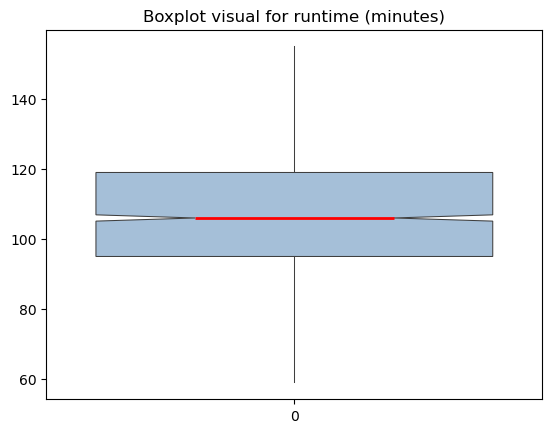

In [40]:
sns.boxplot(df_cleaning3["runtime_minutes"], 
            linewidth=.75,
            notch=True, 
            showcaps=False,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.3, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 2})

plt.title("Boxplot visual for runtime (minutes)")

Yes, it has worked. Lets now clip the remaining columns using our `handle_outliers(colmn)` function

In [41]:
handle_outliers("averagerating")
handle_outliers("numvotes")
handle_outliers("runtime_minutes")
handle_outliers("domestic_gross")
handle_outliers("foreign_gross")

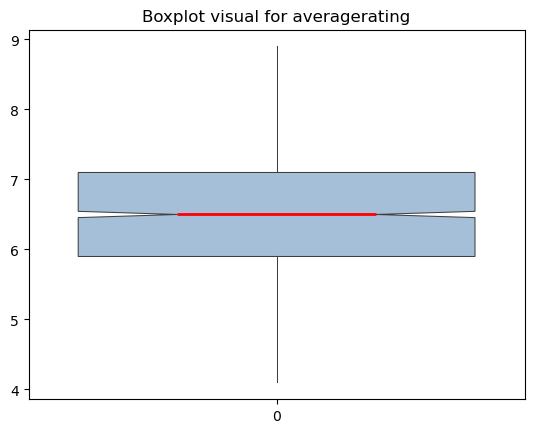

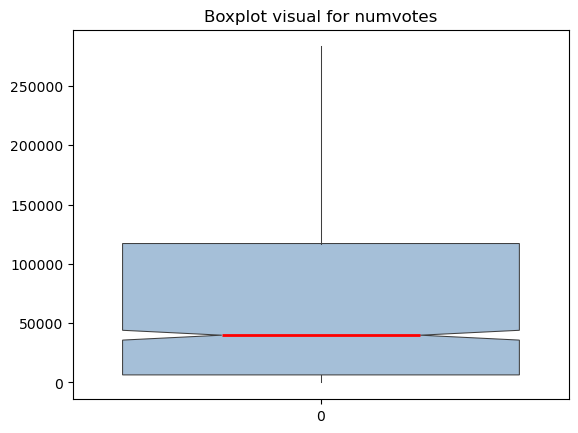

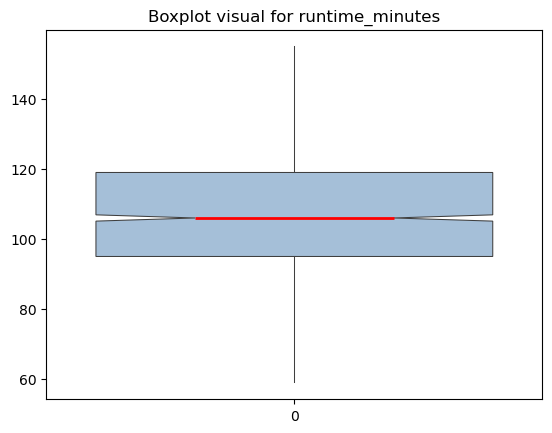

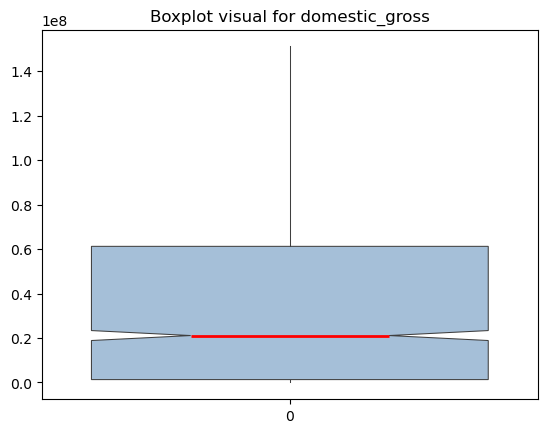

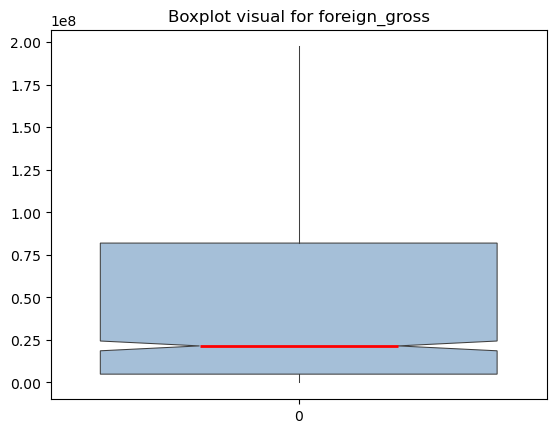

In [42]:
selected_columns = ['averagerating', 'numvotes', 'runtime_minutes','domestic_gross','foreign_gross' ]

for column in selected_columns:
    sns.boxplot(data = df_cleaning3[column], 
                linewidth=.75,
                notch=True,
                showcaps=False,
                flierprops={"marker": "*"},
                boxprops={"facecolor": (.3, .5, .7, .5)},
                medianprops={"color": "r", "linewidth": 2})
    plt.title(f"Boxplot visual for {column}")
    plt.show()

            


Now i will use the cleaned dataset to proceed with the analysis

In [43]:
df = df_cleaning3.copy(deep = True)

In [44]:
cols_to_check = ['averagerating', 'numvotes', 'runtime_minutes','domestic_gross','foreign_gross']

In [45]:
print("Mean")
print(df[cols_to_check].mean())
print("\n")
print("Median")
print(df[cols_to_check].median())
print("\n")
print("Mode")
print(df[cols_to_check].mode())
print("\n")
print("Standard Deviation")
print(df[cols_to_check].std())

Mean
averagerating      6.475325e+00
numvotes           7.803025e+04
runtime_minutes    1.077453e+02
domestic_gross     4.049170e+07
foreign_gross      5.506381e+07
dtype: float64


Median
averagerating             6.5
numvotes              39870.0
runtime_minutes         106.0
domestic_gross     21100000.0
foreign_gross      21500000.0
dtype: float64


Mode
   averagerating   numvotes  runtime_minutes  domestic_gross  foreign_gross
0            6.6  283243.75            105.0     151050000.0    197525000.0


Standard Deviation
averagerating      9.404356e-01
numvotes           9.091536e+04
runtime_minutes    1.856419e+01
domestic_gross     4.832636e+07
foreign_gross      6.755300e+07
dtype: float64


In [46]:
# df.hist()
# plt.figure()

C:\Users\Steve Abonyo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


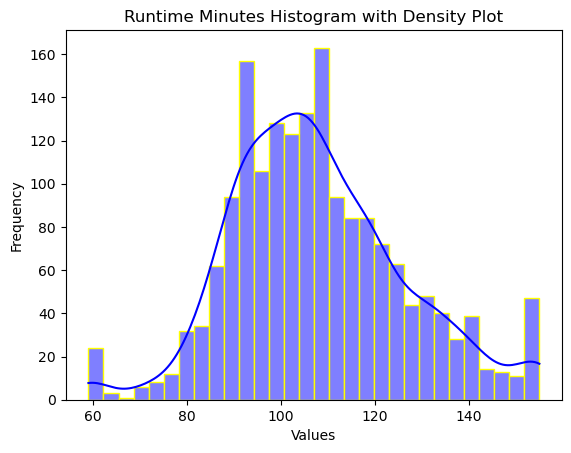

In [47]:
## Showing a histogram of runtime_minutes of the variables
sns.histplot(df["runtime_minutes"], bins=30, kde=True, color='blue', edgecolor='yellow')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Runtime Minutes Histogram with Density Plot')
 
# Display the plot
plt.show()

**From the Runtime Minutes Histogram;** *i can see the data has 2 peaks-it seems bi-modal*, still the variable has some outliers

<span style='color:Blue'>***Most movies are between 90-120 mins***</span>

More minutes are skewed to the left meaning more minutes for movies

C:\Users\Steve Abonyo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


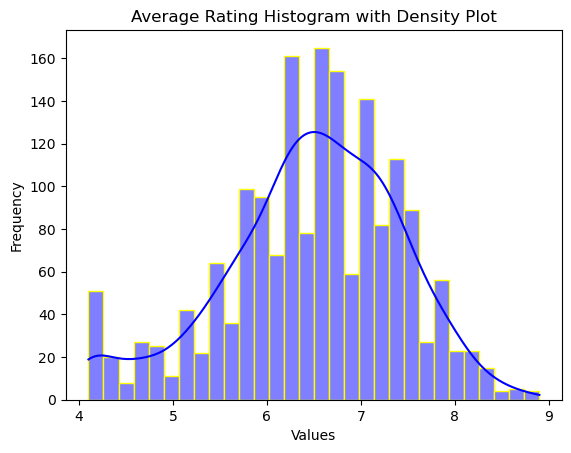

In [48]:
## Showing a histogram of averagerating variables
sns.histplot(df["averagerating"], bins=30, kde=True, color='blue', edgecolor='yellow')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Average Rating Histogram with Density Plot')
 
# Display the plot
plt.show()

**From the Average Rating Histogram;** *We can see that i has quite a number of modes*

<span style='color:Blue'>***The rating is quite spread out so we really not derive a recommendation from this, but they should strive range somewhere between 5.8 and 7.5 to be on the safe side***</span>

In [49]:
## Let me now check the the studion that gives the best domestic gross income and foreign domestice gross income respectively

In [50]:
best_studio_domesticgross = df.groupby(["studio"])["domestic_gross"].sum()
best_studio_domesticgross.sort_values(ascending=False).head(5)

studio
Uni.    1.113198e+10
Fox     9.934550e+09
BV      9.128300e+09
WB      8.045350e+09
Par.    6.369563e+09
Name: domestic_gross, dtype: float64

In [51]:
best_studio_foreigngross = df.groupby(["studio"])["foreign_gross"].sum()
best_studio_foreigngross.sort_values(ascending=False).head(5)

studio
Fox     1.354974e+10
Uni.    1.273565e+10
BV      1.148245e+10
WB      9.975653e+09
Sony    8.018975e+09
Name: foreign_gross, dtype: float64

<span style='color:Blue'>***Generally, 3 studios appears both in the best domestic gross outcome and foreign gross outcome, i.e., Fox, Uni and BV, so first microsoft should choose any of the three for their movie production***</span>

In [52]:
best_year_domesticgross = df.groupby(["year"])["domestic_gross"].sum()
best_year_domesticgross.sort_values(ascending=False)

year
2011    8.708874e+09
2015    8.593540e+09
2013    8.331493e+09
2010    7.937691e+09
2017    7.800340e+09
2016    7.767058e+09
2014    7.749602e+09
2012    7.425032e+09
2018    7.235195e+09
Name: domestic_gross, dtype: float64

In [53]:
best_year_foreigngross = df.groupby(["year"])["foreign_gross"].sum().sort_values(ascending=False)
best_year_foreigngross

year
2017    1.224025e+10
2016    1.185022e+10
2013    1.155949e+10
2011    1.122687e+10
2015    1.105509e+10
2014    1.058448e+10
2018    9.709274e+09
2012    9.559271e+09
2010    9.512817e+09
Name: foreign_gross, dtype: float64

<span style='color:Blue'>***Between 2010-2019: in the `2011`, `2015`, `2013` and `2010` are appearing as the top most for overall domestic gross income generated, i.e., these countries mentioned are in the first half of this period, the latter half is mostly in the bottom 5, implying in the first half the return from the domestic market was good***</span>

<span style='color:Blue'>***For foreign gross income, we see that the latter part of the 10 year study appears in the top 5 i.e., `2017`, `2016`, and `2015`***</span>

<span style='color:Brown'>***This means that the focus is now more to the foreign consumers, so Microsoft should focus more on also inclusivity of the international views so as to gain more income***</span>

In [54]:
Top_5_genres = df["genres"].value_counts().index[0:5].tolist()
Top_5_genres_counts = df["genres"].value_counts().values[0:5].tolist()
print(Top_5_genres)
print(Top_5_genres_counts)

['Drama', 'Comedy,Drama', 'Adventure,Animation,Comedy', 'Comedy,Drama,Romance', 'Drama,Romance']
[115, 73, 72, 66, 61]


C:\Users\Steve Abonyo\AppData\Local\Temp\ipykernel_8552\1635921.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(Top_5_genres, rotation = 90, zorder=100)


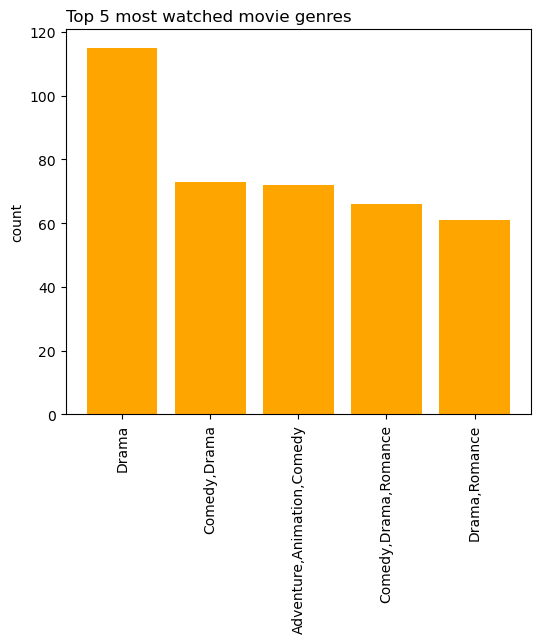

In [55]:
bar_chart_title = "Top 5 most watched movie genres"

fig, ax = plt.subplots(figsize = (6, 5))

ax.bar(Top_5_genres,Top_5_genres_counts,color = 'orange') ## note that if you try barh puts the graph to be horizontal
width = 0.25
ax.set_ylabel("count")
ax.set_title(bar_chart_title,
            loc = 'left')
ax.set_xticklabels(Top_5_genres, rotation = 90, zorder=100)

plt.show()

<span style='color:Blue'>***Drama type of movies is the route to go for microsoft***</span>

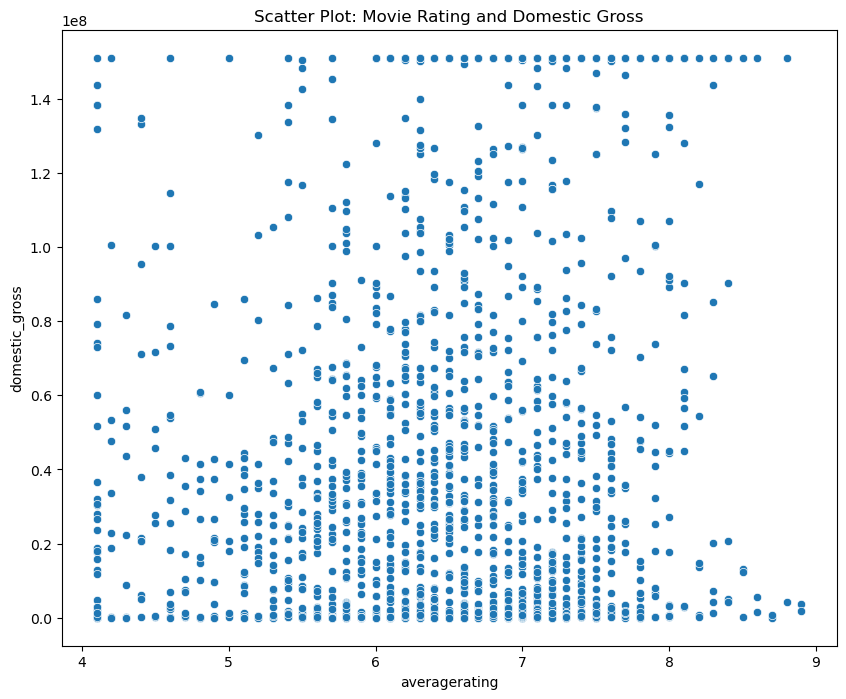

In [56]:
columns_of_interest = ['averagerating','domestic_gross']
df_sct = df[columns_of_interest]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='averagerating', y='domestic_gross', data=df_sct)
plt.title('Scatter Plot: Movie Rating and Domestic Gross')
plt.xlabel('averagerating')
plt.ylabel('domestic_gross')
plt.show()

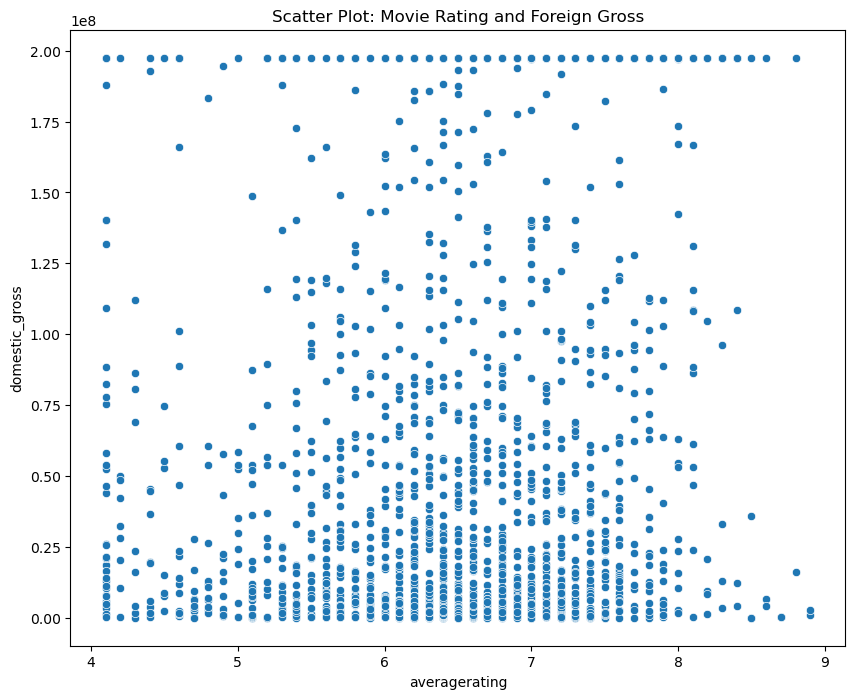

In [57]:
columns_of_interest = ['averagerating','foreign_gross']
df_sct = df[columns_of_interest]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='averagerating', y='foreign_gross', data=df_sct)
plt.title('Scatter Plot: Movie Rating and Foreign Gross')
plt.xlabel('averagerating')
plt.ylabel('domestic_gross')
plt.show()

<span style='color:Blue'>***From both visuals, showing movie average rating and domestic and gross income respectively, we see that the gross income when the rating is between 5.8 and 7.5***</span>

<span style='color:Brown'>***Microsft should really try so that the movies they will produce fall within the ratio of 5.8:7:5 so that they reap the most***</span>

##### ***Exploring the relationship between Number of votes and Average rating***

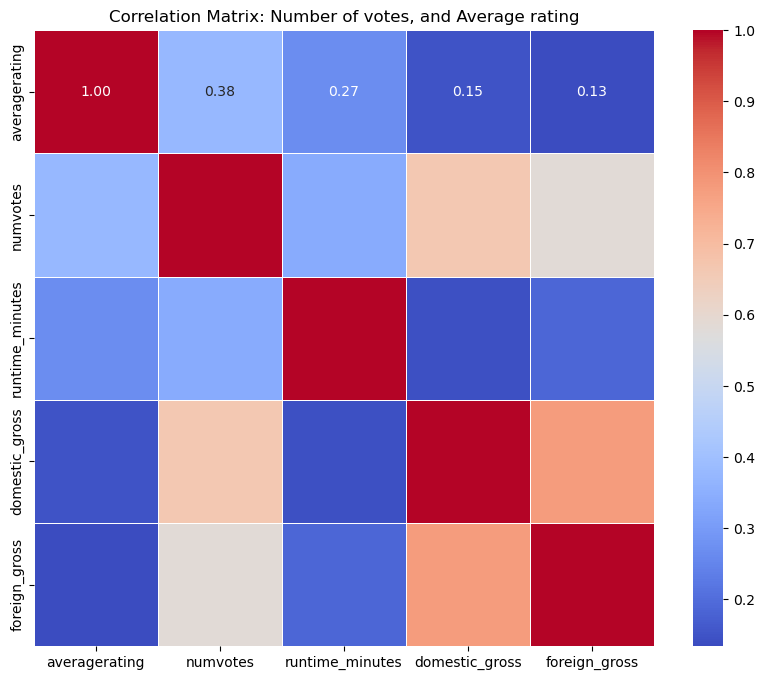

None


In [58]:
# Selecting relevant columns
selected_columns = ['averagerating', 'numvotes', 'runtime_minutes','domestic_gross','foreign_gross']
correlation_df = df[selected_columns]

# Correlation matrix
correlation_matrix = correlation_df.corr()
# Visualizing using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Number of votes, and Average rating')
print(plt.show())

In [59]:
correlation_matrix = correlation_df.corr()
correlation_matrix

,averagerating,numvotes,runtime_minutes,domestic_gross,foreign_gross
averagerating,1.000000,0.376249,0.267372,0.148042,0.134273
numvotes,0.376249,1.000000,0.340455,0.663636,0.582207
runtime_minutes,0.267372,0.340455,1.000000,0.141650,0.186008
domestic_gross,0.148042,0.663636,0.141650,1.000000,0.777419
foreign_gross,0.134273,0.582207,0.186008,0.777419,1.000000


<span style='color:Brown'> ***Three variables seem to be strongly positively correlated, i.e., number of votes, foreigh gross and domestic gross***</span>

In [60]:
df.head(2)

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,283243.75,BV,151050000.0,197525000.0,2010
3,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,283243.75,WB,151050000.0,197525000.0,2010


***I know want to classify the average rating into groups***

In [61]:
## option 1 using the lambda function
# df['Rating_Grouped'] = df['averagerating'].apply(lambda x: 'Above 5' if x > 5 else 'Less than or equal to 5')

## option 2 using list comprehension
df['Rating_Grouped'] = ['Above 5 rate' if x > 5 else 'Less than or equal to 5 rate' for x in df['averagerating']] 

In [62]:
df.sample(4)

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,Rating_Grouped
2115,tt2296777,Sherlock Gnomes,2018,86.0,"Adventure,Animation,Comedy",5.1,8030.0,Par.,43200000.0,47100000.0,2018,Above 5 rate
1119,tt2070776,Populaire,2012,111.0,"Comedy,Romance,Sport",6.9,10746.0,Wein.,179000.0,5300000.0,2013,Above 5 rate
1085,tt1381404,The Company You Keep,2012,125.0,"Drama,Thriller",6.4,29665.0,SPC,5100000.0,14500000.0,2013,Above 5 rate
1008,tt1702439,Safe Haven,2013,115.0,"Drama,Romance,Thriller",6.7,97055.0,Rela.,71300000.0,26200000.0,2013,Above 5 rate


***I know want to classify the run time minutes into groups***

In [63]:
df["runtime_minutes"] = df["runtime_minutes"].astype(int)
df["runtime_minutes"].dtype

dtype('int32')

In [64]:

## creating a column now using a for loop
#df_f = df.copy(deep=True))

# runtime_result = []
# for time_min in df_f["runtime_minutes"]:
#     if time_min > 0 & time_min <= 100:
#         runtime_result.append("Between 1 and 100mins")
#     elif time_min > 100 & time_min <= 120:
#         runtime_result.append("Between 101 and 120mins")
#     else:
#         runtime_result.append("Above 120mins")   
# df_f["Runtime_minutes_grouped"] = runtime_result 
# df = df_f.copy(deep=True)

##THIS IS GIVING ME WRONG RESULTS




## I am now using list comprehension instead
df['Runtime_minutes_grouped'] = ['Time above 100mins' if x > 100 else 'Time below/equal to 100mins' for x in df['runtime_minutes']] 

In [65]:
df.sample(10)

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,Rating_Grouped,Runtime_minutes_grouped
510,tt1023114,The Way Back,2010,133,"Adventure,Drama,History",7.3,102126.0,NM,2700000.0,17600000.0,2011,Above 5 rate,Time above 100mins
1924,tt4925292,Lady Bird,2017,94,"Comedy,Drama",7.4,177677.0,A24,49000000.0,30000000.0,2017,Above 5 rate,Time below/equal to 100mins
1812,tt5282006,The Duelist,2016,109,"Action,Drama,Thriller",6.4,2487.0,Sony,13500.0,6100000.0,2016,Above 5 rate,Time above 100mins
1053,tt1931435,The Big Wedding,2013,89,"Comedy,Drama,Romance",5.6,44221.0,LGF,21800000.0,24700000.0,2013,Above 5 rate,Time below/equal to 100mins
1704,tt1860213,Dirty Grandpa,2016,102,Comedy,5.9,101393.0,LGF,35600000.0,58500000.0,2016,Above 5 rate,Time above 100mins
1884,tt2239822,Valerian and the City of a Thousand Planets,2017,137,"Action,Adventure,Fantasy",6.5,139792.0,STX,41200000.0,184700000.0,2017,Above 5 rate,Time above 100mins
787,tt1441952,Salmon Fishing in the Yemen,2011,107,"Comedy,Drama,Romance",6.8,58864.0,CBS,9000000.0,25500000.0,2012,Above 5 rate,Time above 100mins
381,tt1033575,The Descendants,2011,115,"Comedy,Drama",7.3,223464.0,FoxS,82600000.0,94700000.0,2011,Above 5 rate,Time above 100mins
132,tt0492389,Furry Vengeance,2010,92,"Comedy,Family",4.1,14700.0,Sum.,17600000.0,18600000.0,2010,Less than or equal to 5 rate,Time below/equal to 100mins
386,tt1204342,The Muppets,2011,103,"Adventure,Comedy,Family",7.1,82752.0,BV,88600000.0,76600000.0,2011,Above 5 rate,Time above 100mins


In [66]:
## Now i would like to see a graph between runtime minutes and rating

In [67]:
df['Runtime_minutes_grouped'].value_counts()

Runtime_minutes_grouped
Time above 100mins             1100
Time below/equal to 100mins     667
Name: count, dtype: int64

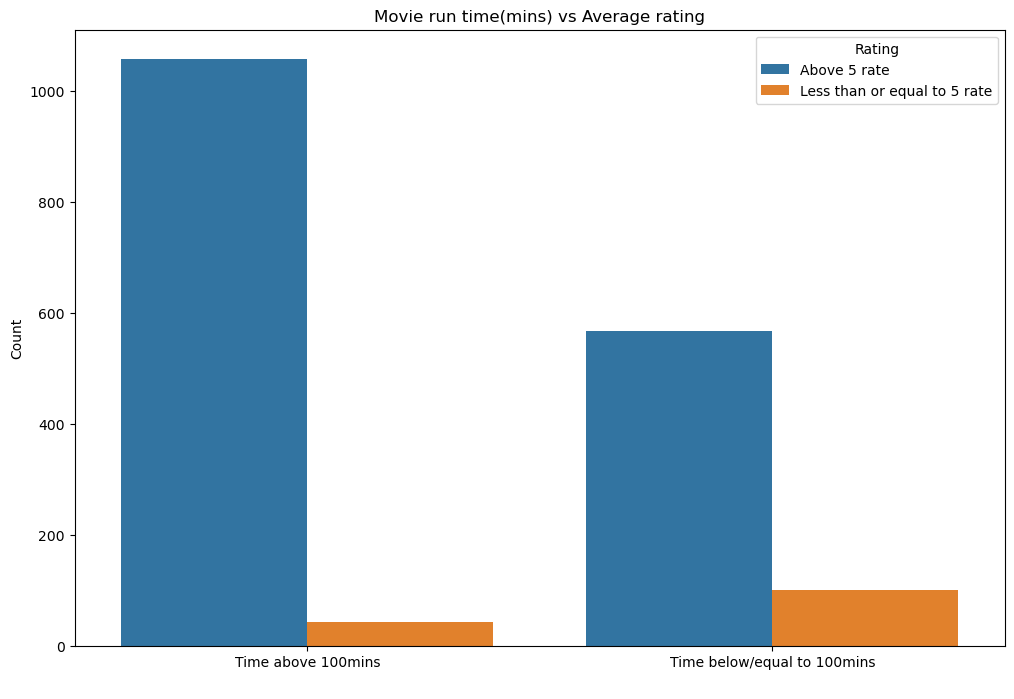

In [68]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Runtime_minutes_grouped',hue='Rating_Grouped' , data=df)
plt.title('Movie run time(mins) vs Average rating')
plt.ylabel('Count')
plt.xlabel(' ')
plt.legend(title='Rating', labels=['Above 5 rate', 'Less than or equal to 5 rate'])
plt.show()

<span style='color:Blue'> ***From the above graph, we see that it of great advantage to have your movie less than 100mins, as we can see, rating less than 5 is higher for movies whose duration is more than 100 mins*** </span>